In [1]:
import pandas as pd
tc_boston =  pd.read_csv('./data/truecar_details_boston_ma.csv')
tc_boston.head(5)

,url,exterior,interior,mileage,fuel_type,listed_since,vin,stock_number,list_price,average_list_price,price_range_excellent,price_range_great,price_range_fair,price_range_high,price_description,seller_notes,epa_range
0,https://www.truecar.com/used-cars-for-sale/lis...,Black,Black,"North Attleborough, MA (0 miles away)",Gas,Listed 3 days ago,1FTEW1CP2PKD61358,26893059,"$29,998","$35,702","Below $33,917","$33,917 - $35,345","$35,345 - $36,773","Above $36,773","The list price of$29,998for this2023 Ford F‑15...",CarMax values transparency and wants you to lo...,NaN
1,https://www.truecar.com/used-cars-for-sale/lis...,Oxford White,Ebony,"Stoneham, MA (3 miles away)",Gas,Listed 32 days ago,1FTBR1Y86PKA51502,23125P,"$35,990","$39,911","Below $37,915","$37,915 - $39,511","$39,511 - $41,108","Above $41,108","The list price of$35,990for this2023 Ford Tran...",This Ford Transit Cargo Van delivers a Regular...,NaN
2,https://www.truecar.com/used-cars-for-sale/lis...,Granite Crystal Metallic Clearcoat,Black,"Reading, MA (1 miles away)",Gas,Listed 68 days ago,1C4HJXDG4LW103150,SE067231A,"$19,250","$21,683","Below $20,599","$20,599 - $21,466","$21,466 - $22,333","Above $22,333","The list price of$19,250for this2020 Jeep Wran...",RT 128 Honda is proud to present you with anot...,NaN
3,https://www.truecar.com/used-cars-for-sale/lis...,Diamond Slate,Graphite,"Somerville, MA (11 miles away)",Gas,Listed 14 days ago,5N1AL0MM0DC348728,348728,"$8,995","$11,325","Below $10,758","$10,758 - $11,211","$11,211 - $11,664","Above $11,664","The list price of$8,995for this2013 INFINITI J...",NaN,NaN
4,https://www.truecar.com/used-cars-for-sale/lis...,Shimmering White,Beige,"Waltham, MA (13 miles away)",Gas,Listed 18 days ago,5NPDH4AE7DH254907,NaN,"$8,998","$11,724","Below $11,137","$11,137 - $11,606","$11,606 - $12,075","Above $12,075","The list price of$8,998for this2013 Hyundai El...","Automatic Transmisiion.A well-maintained, supe...",NaN


In [2]:
# strip $ and comma from the price column
tc_boston['sales_price'] = tc_boston['list_price'].str.replace('$','').str.replace(',','').astype(float)

In [ ]:
# Calculate average price for all cars
avg_price = tc_boston['sales_price'].mean()
print(f"Average price for all cars: {avg_price:.2f}")

Average price for all cars: 17133.27


In [ ]:
# get the exterior color and count of each color as a DataFrame

exterior_color_count = tc_boston['exterior'].value_counts().reset_index()
print("Exterior Color count:")
exterior_color_count

Color count:


,exterior,count
0,Black,505
1,Gray,416
2,Oxford White,348
3,Granite Crystal Metallic Clearcoat,317
4,Silver Ice Metallic,238
...,...,...
413,Rhodium White Metallic,1
414,Still Night Pearl,1
415,Space White Metallic,1
416,Sapphire Blue,1


In [6]:
interior_color_count = tc_boston['interior'].value_counts().reset_index()
print("Interior Color count:")
interior_color_count

Interior Color count:


,interior,count
0,Black,2121
1,Gray,790
2,Jet Black,468
3,Beige,323
4,Charcoal Black,310
...,...,...
194,Alpine,1
195,Charcoal Sport,1
196,Wheat,1
197,Jet Black/Adrenaline Red,1


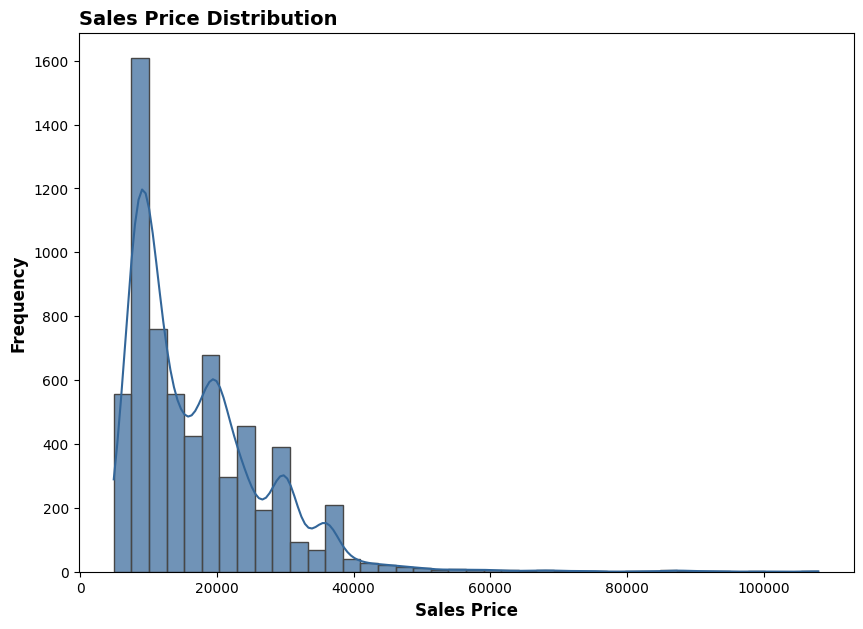

In [12]:
# matplotlib histogram of the sales price
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))

sns.histplot(tc_boston['sales_price'], bins=40, kde=True, color='#336699', edgecolor='#474747', alpha=0.7)   
plt.title('Sales Price Distribution', fontsize=14, fontweight='bold', loc='left') # R G B 00 00 00 - FF FF FF
plt.xlabel('Sales Price', fontsize=12, fontweight='bold', color = "black")
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color = "black")
plt.grid(False)
plt.show()

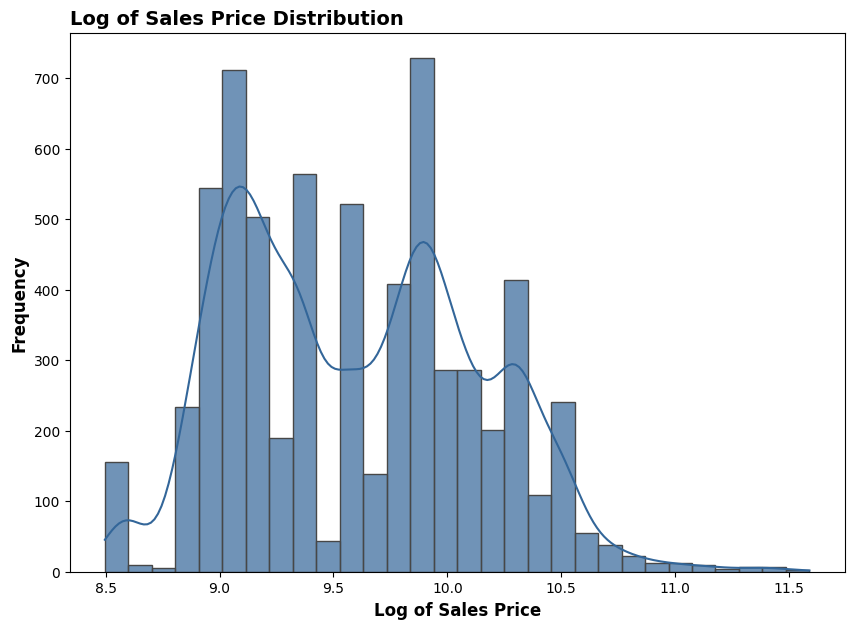

In [15]:
import numpy as np
# matplotlib histogram of the log of sales price
plt.figure(figsize=(10, 7))
sns.histplot(tc_boston['sales_price'].apply(lambda x: np.log(x)), bins=30, kde=True, color='#336699', edgecolor='#474747', alpha=0.7)
plt.title('Log of Sales Price Distribution', fontsize=14, fontweight='bold', loc='left') # R G B 00 00 00 - FF FF FF
plt.xlabel('Log of Sales Price', fontsize=12, fontweight='bold', color = "black")
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color = "black")
plt.grid(False)
plt.show()

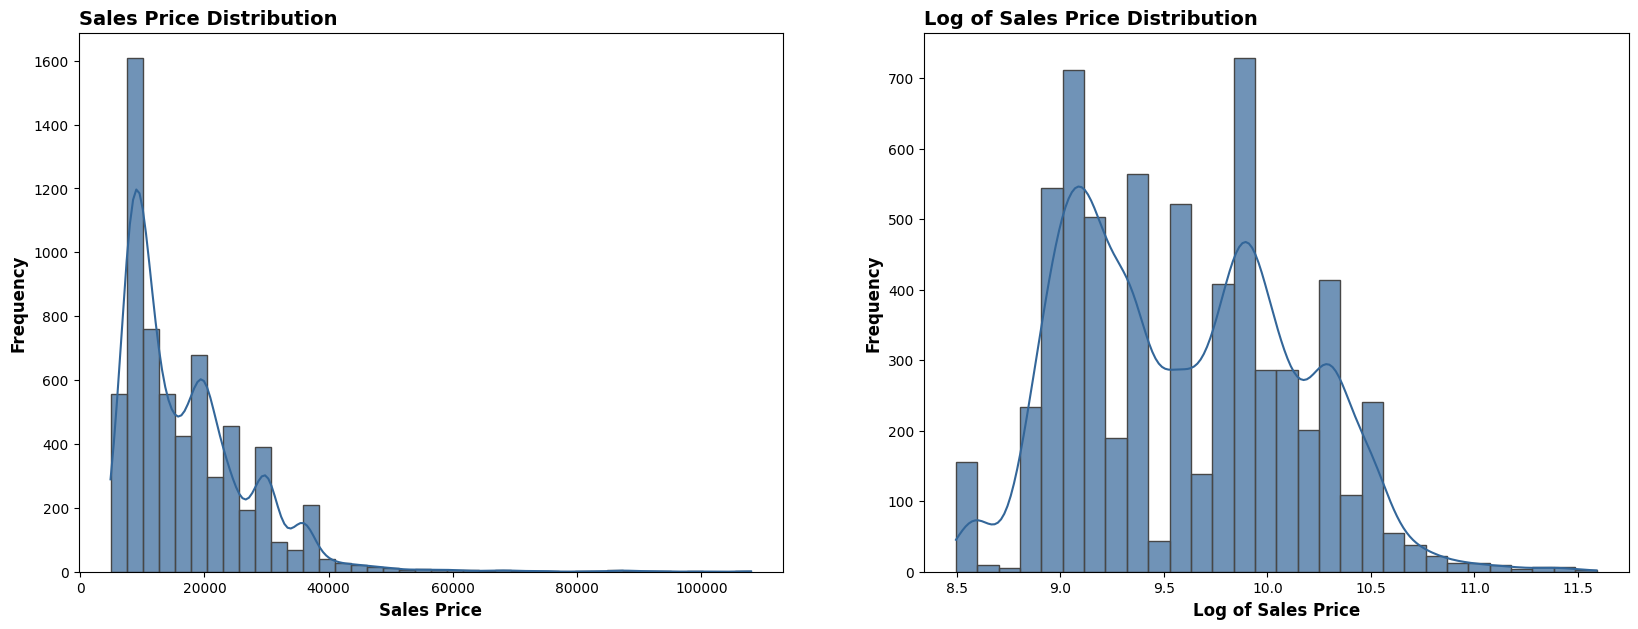

In [21]:
plt.subplots(1, 2, figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(tc_boston['sales_price'], bins=40, kde=True, color='#336699', edgecolor='#474747', alpha=0.7)   
plt.title('Sales Price Distribution', fontsize=14, fontweight='bold', loc='left') # R G B 00 00 00 - FF FF FF
plt.xlabel('Sales Price', fontsize=12, fontweight='bold', color = "black")
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color = "black")
plt.grid(False)
plt.subplot(1, 2, 2)
sns.histplot(tc_boston['sales_price'].apply(lambda x: np.log(x)), bins=30, kde=True, color='#336699', edgecolor='#474747', alpha=0.7)
plt.title('Log of Sales Price Distribution', fontsize=14, fontweight='bold', loc='left') # R G B 00 00 00 - FF FF FF
plt.xlabel('Log of Sales Price', fontsize=12, fontweight='bold', color = "black")
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color = "black")
plt.grid(False)


plt.show()

In [24]:
# plotly histogram of the sales price
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# plotly histograpm of sale price

fig = px.histogram(tc_boston, x='sales_price', nbins=100, title='Sales Price Distribution', color_discrete_sequence=['#336699'])
fig.update_traces(marker_line_color='#474747', marker_line_width=1.5, opacity=0.7)
fig.update_layout(title_x=0.05, xaxis_title='Sales Price', yaxis_title='Frequency')
fig.show() 